In [1]:
# SCENARIO SIMULATION 

# Demand Spike Scenario 

import pandas as pd

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Simulate 20% increase in demand

demand_increase_factor = 1.2

# Create new columns for the simulated scenario
# We assume Qnty, Sales, Profit, and Cost are the totals for that transaction line.
# If demand increases, the quantities and their financial outcomes scale proportionally.

df_simulated = df.copy()
df_simulated['Simulated_Qnty'] = df_simulated['Qnty'] * demand_increase_factor
df_simulated['Simulated_Sales'] = df_simulated['Sales'] * demand_increase_factor
df_simulated['Simulated_Profit'] = df_simulated['Profit'] * demand_increase_factor
df_simulated['Simulated_Cost'] = df_simulated['Cost'] * demand_increase_factor

# Comparison Summary by Product Category

comparison = df.groupby('Product_Category').agg({
    'Qnty': 'sum',
    'Cost': 'sum',
    'Profit': 'sum'
}).rename(columns={
    'Qnty': 'Original_Total_Qnty',
    'Cost': 'Original_Total_Cost',
    'Profit': 'Original_Total_Profit'
})

sim_agg = df_simulated.groupby('Product_Category').agg({
    'Simulated_Qnty': 'sum',
    'Simulated_Cost': 'sum',
    'Simulated_Profit': 'sum'
})

# Merge for comparison

summary_df = pd.concat([comparison, sim_agg], axis=1)

# Calculate total impact

totals = summary_df.sum().to_frame().T
totals.index = ['Total']

summary_with_totals = pd.concat([summary_df, totals])

print("Scenario Simulation: 20% Demand Increase Across All Categories")
print(summary_with_totals[['Original_Total_Qnty', 'Simulated_Qnty', 'Original_Total_Cost', 'Simulated_Cost']].tail())

# Save the simulated dataset and the summary

df_simulated.to_csv('simulated_demand_increase.csv', index=False)
summary_with_totals.to_csv('simulation_summary_report.csv')

Scenario Simulation: 20% Demand Increase Across All Categories
       Original_Total_Qnty  Simulated_Qnty  Original_Total_Cost  \
73                   357.0           428.4         1.170068e+05   
74                   529.0           634.8         6.104660e+03   
75                   838.0          1005.6         3.331050e+04   
76                   650.0           780.0         1.402830e+05   
Total             384079.0        460894.8         2.549516e+07   

       Simulated_Cost  
73       1.404081e+05  
74       7.325592e+03  
75       3.997260e+04  
76       1.683396e+05  
Total    3.059419e+07  


Region Comparison (Top 10 affected by simulated delay):
       Order Region  Original_Avg_Delay  Simulated_Avg_Delay  Delay_Increase
19      West Africa            3.510552             6.734307        3.223755
5       East Africa            3.492441             6.697084        3.204644
9      North Africa            3.446163             6.662438        3.216275
15   Southeast Asia            3.476780             6.615473        3.138694
7      Eastern Asia            3.500275             6.610165        3.109890
2    Central Africa            3.546213             6.608229        3.062016
16  Southern Africa            3.400173             6.598099        3.197926
18       US Center             3.436385             6.589095        3.152709
21     West of USA             3.478794             6.585888        3.107094
11          Oceania            3.469452             6.580903        3.111451


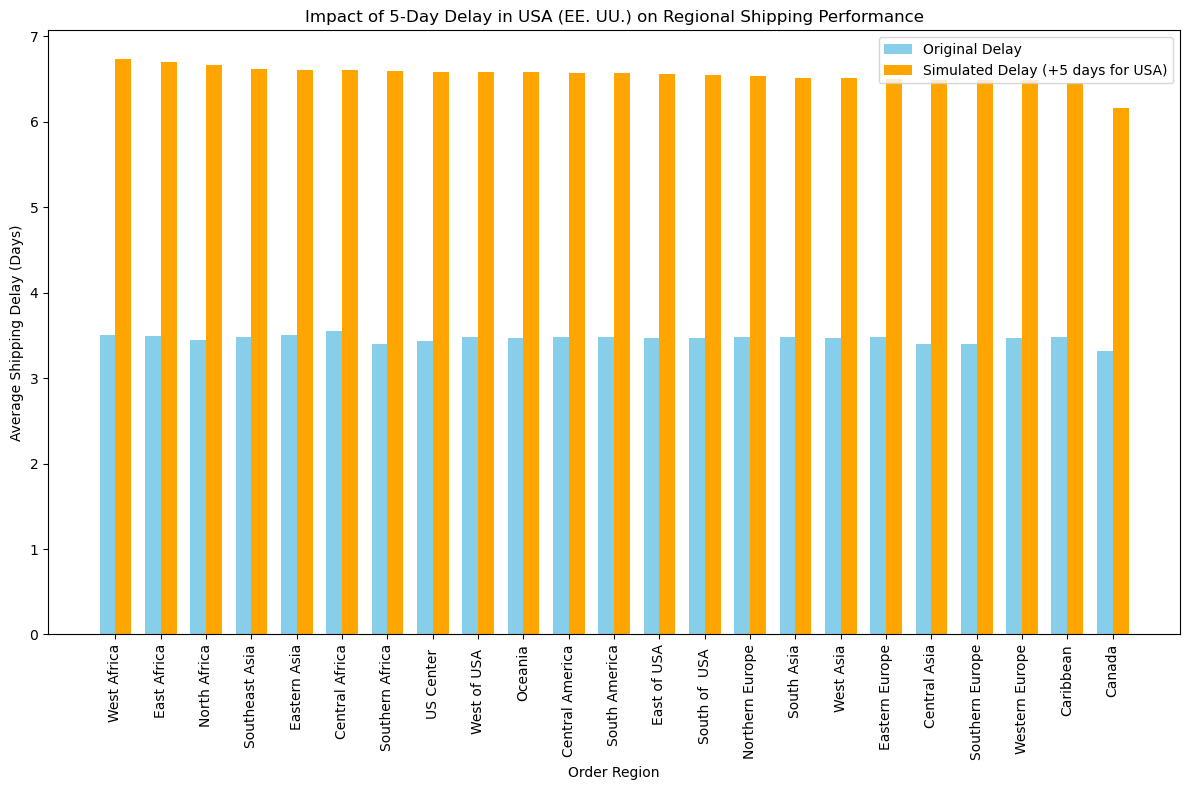

In [2]:
# Scenario Simulation 

# Scenario 2 : Supplier Delay Scenario 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Scenario 2: Increase shipping delays by 5 days for customers in 'EE. UU.'

target_country = 'EE. UU.'
df_sim2 = df.copy()

# Apply the increase

df_sim2['Simulated_Delay'] = df_sim2['shipping_delay']
df_sim2.loc[df_sim2['Cust_Country'] == target_country, 'Simulated_Delay'] += 5

# Calculate Average Delays by Region: Original vs Simulated

region_comparison = df.groupby('Order Region')['shipping_delay'].mean().reset_index()
region_comparison.columns = ['Order Region', 'Original_Avg_Delay']

sim2_region_avg = df_sim2.groupby('Order Region')['Simulated_Delay'].mean().reset_index()
sim2_region_avg.columns = ['Order Region', 'Simulated_Avg_Delay']

# Merge for comparison

region_comparison = pd.merge(region_comparison, sim2_region_avg, on='Order Region')
region_comparison['Delay_Increase'] = region_comparison['Simulated_Avg_Delay'] - region_comparison['Original_Avg_Delay']

# Sort by the highest simulated delay

region_comparison = region_comparison.sort_values(by='Simulated_Avg_Delay', ascending=False)

print("Region Comparison (Top 10 affected by simulated delay):")
print(region_comparison.head(10))

# Visualization

plt.figure(figsize=(12, 8))
x = range(len(region_comparison))
width = 0.35

plt.bar([i - width/2 for i in x], region_comparison['Original_Avg_Delay'], width, label='Original Delay', color='skyblue')
plt.bar([i + width/2 for i in x], region_comparison['Simulated_Avg_Delay'], width, label='Simulated Delay (+5 days for USA)', color='orange')

plt.xlabel('Order Region')
plt.ylabel('Average Shipping Delay (Days)')
plt.title('Impact of 5-Day Delay in USA (EE. UU.) on Regional Shipping Performance')
plt.xticks(x, region_comparison['Order Region'], rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('scenario2_delay_comparison.png')

# Save the reports

region_comparison.to_csv('scenario2_region_impact.csv', index=False)
df_sim2.to_csv('simulated_delay_increase.csv', index=False)

Global Totals for Scenario 3:
Shipping_Quantity         3.840790e+05
Original_Total_Cost       2.549516e+07
Simulated_Total_Cost      2.931943e+07
Original_Total_Profit     3.966903e+06
Simulated_Total_Profit    7.465303e+06
dtype: float64


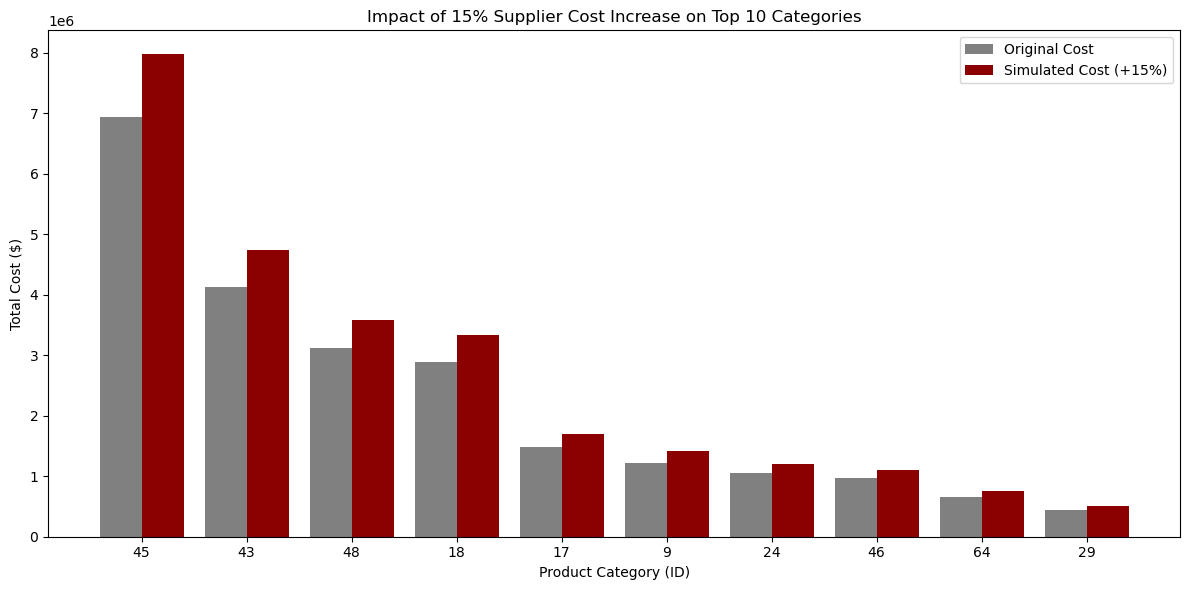

In [3]:
# Scenario Simulation 

# Scenario 3 : Cost Fluctuation Scenario 

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Scenario 3: Supplier costs increase by 15%

cost_increase_factor = 1.15

df_sim3 = df.copy()
# Recalculate the cost per line item

df_sim3['Simulated_Cost'] = df_sim3['Cost'] * cost_increase_factor

# Recalculate Profit based on the new cost (Assuming Sales price remains the same)

df_sim3['Simulated_Profit'] = df_sim3['Sales'] - df_sim3['Simulated_Cost']

# Summarize impact by Product Category
# Shipping quantities (Qnty) remain the same as the original as demand is assumed static

summary_sim3 = df_sim3.groupby('Product_Category').agg({
    'Qnty': 'sum',
    'Cost': 'sum',
    'Simulated_Cost': 'sum',
    'Profit': 'sum',
    'Simulated_Profit': 'sum'
}).reset_index()

summary_sim3.columns = [
    'Product_Category', 
    'Shipping_Quantity', 
    'Original_Total_Cost', 
    'Simulated_Total_Cost', 
    'Original_Total_Profit', 
    'Simulated_Total_Profit'
]

# Calculate global totals for the response

totals = summary_sim3.sum()

print("Global Totals for Scenario 3:")
print(totals[['Shipping_Quantity', 'Original_Total_Cost', 'Simulated_Total_Cost', 'Original_Total_Profit', 'Simulated_Total_Profit']])

# Visualization: Compare Original vs Simulated Cost for Top 10 Cost Categories

top_10_costly = summary_sim3.nlargest(10, 'Original_Total_Cost')

plt.figure(figsize=(12, 6))
x = range(len(top_10_costly))
width = 0.4

plt.bar([i - width/2 for i in x], top_10_costly['Original_Total_Cost'], width, label='Original Cost', color='gray')
plt.bar([i + width/2 for i in x], top_10_costly['Simulated_Total_Cost'], width, label='Simulated Cost (+15%)', color='darkred')

plt.xlabel('Product Category (ID)')
plt.ylabel('Total Cost ($)')
plt.title('Impact of 15% Supplier Cost Increase on Top 10 Categories')
plt.xticks(x, top_10_costly['Product_Category'])
plt.legend()
plt.tight_layout()
plt.savefig('scenario3_supplier_cost_impact.png')

# Save the resulting dataframes

df_sim3.to_csv('simulated_supplier_cost_increase.csv', index=False)
summary_sim3.to_csv('scenario3_cost_summary.csv', index=False)

In [4]:
# Quick check on the relationship between Sales, Profit and Cost

check_df = df[['Sales', 'Profit', 'Cost']].head()
check_df['Calculated_Internal_Cost'] = check_df['Sales'] - check_df['Profit']
print(check_df)

    Sales      Profit    Cost  Calculated_Internal_Cost
0  327.75   91.250000  327.75                236.500000
1  327.75 -249.089996  327.75                576.839996
2  327.75 -247.779999  327.75                575.529999
3  327.75   22.860001  327.75                304.889999
4  327.75  134.210007  327.75                193.539993


Original Total Supplier Cost: $32,817,832.04
Simulated Total Supplier Cost (+15%): $37,740,506.85
Original Total Profit: $3,966,902.97
Simulated Total Profit: $-955,771.83


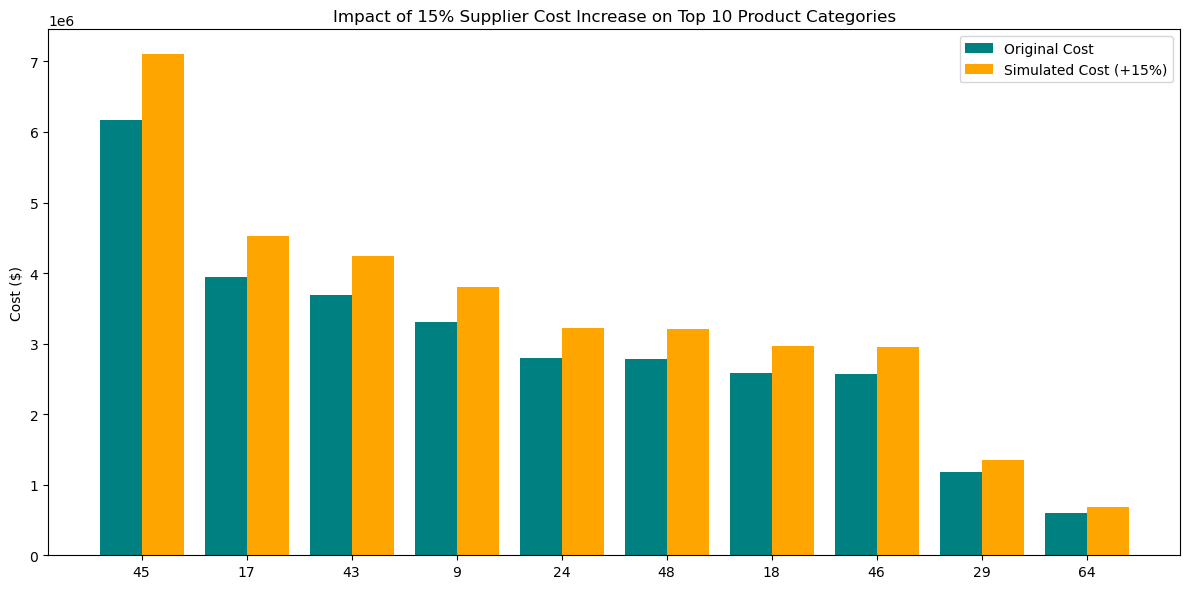

In [5]:
# Corrected Scenario 3 Simulation

# 1. Infer internal cost
df_sim3['Internal_Cost'] = df_sim3['Sales'] - df_sim3['Profit']

# 2. Increase internal cost by 15%
df_sim3['Simulated_Internal_Cost'] = df_sim3['Internal_Cost'] * 1.15

# 3. Recalculate profit based on increased supplier costs
df_sim3['Simulated_Profit'] = df_sim3['Sales'] - df_sim3['Simulated_Internal_Cost']

# 4. Summarize

summary_sim3 = df_sim3.groupby('Product_Category').agg({
    'Qnty': 'sum',
    'Internal_Cost': 'sum',
    'Simulated_Internal_Cost': 'sum',
    'Profit': 'sum',
    'Simulated_Profit': 'sum'
}).reset_index()

summary_sim3.columns = [
    'Product_Category', 
    'Shipping_Quantity', 
    'Original_Supplier_Cost', 
    'Simulated_Supplier_Cost', 
    'Original_Profit', 
    'Simulated_Profit'
]

# Totals

total_orig_cost = summary_sim3['Original_Supplier_Cost'].sum()
total_sim_cost = summary_sim3['Simulated_Supplier_Cost'].sum()
total_orig_profit = summary_sim3['Original_Profit'].sum()
total_sim_profit = summary_sim3['Simulated_Profit'].sum()

print(f"Original Total Supplier Cost: ${total_orig_cost:,.2f}")
print(f"Simulated Total Supplier Cost (+15%): ${total_sim_cost:,.2f}")
print(f"Original Total Profit: ${total_orig_profit:,.2f}")
print(f"Simulated Total Profit: ${total_sim_profit:,.2f}")

# Visualization

top_10_cats = summary_sim3.nlargest(10, 'Original_Supplier_Cost')
plt.figure(figsize=(12, 6))
x = range(len(top_10_cats))
plt.bar([i - 0.2 for i in x], top_10_cats['Original_Supplier_Cost'], 0.4, label='Original Cost', color='teal')
plt.bar([i + 0.2 for i in x], top_10_cats['Simulated_Supplier_Cost'], 0.4, label='Simulated Cost (+15%)', color='orange')
plt.xticks(x, top_10_cats['Product_Category'])
plt.ylabel('Cost ($)')
plt.title('Impact of 15% Supplier Cost Increase on Top 10 Product Categories')
plt.legend()
plt.tight_layout()
plt.savefig('scenario3_supplier_impact.png')

# Save files

df_sim3.to_csv('simulated_supplier_cost_increase.csv', index=False)
summary_sim3.to_csv('scenario3_cost_summary.csv', index=False)